### Análise de dados para recomendação de vendas

### Introdução:

Este relátorio tem por objetivo, apoiar com dados a decisão de um senhor sobre qual de suas 4 lojas deve ser vendida, essa análise foi realizada com base nos dados apresentados abaixo e python.

### Importação dos dados e bibliotecas




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
# Antes de começar vamos remover os valores nulos
loja.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

#1. Análise do faturamento


In [ ]:
# Calculo de faturamento
Faturamento1 = loja["Preço"].sum()
Faturamento2 = loja2["Preço"].sum()
Faturamento3 = loja3["Preço"].sum()
Faturamento4 = loja4["Preço"].sum()

# Vamos vizualizar os dados, convertendo o número de decimais para 2 para facilitar o entendimento.
print(f"O faturamento loja 1 R${Faturamento1:,.2f}")
print(f"O faturamento loja 2 R${Faturamento2:,.2f}")
print(f"O faturamento loja 3 R${Faturamento3:,.2f}")
print(f"O faturamento loja 4 R${Faturamento4:,.2f}")

O faturamento loja 1 R$1,534,509.12
O faturamento loja 2 R$1,488,459.06
O faturamento loja 3 R$1,464,025.03
O faturamento loja 4 R$1,384,497.58


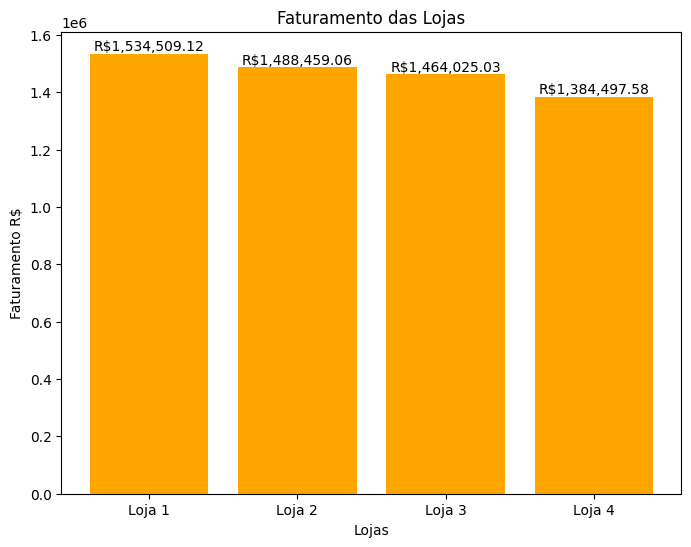

In [19]:
# Armazenando os dados de faturamento
faturamento = [Faturamento1, Faturamento2, Faturamento3, Faturamento4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Criando uma DataFrame para melhor lidar com os dados
df_faturamento = pd.DataFrame({'Loja': lojas, 'Faturamento': faturamento})

# Criando um gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_faturamento['Loja'],df_faturamento['Faturamento'], color = 'orange')
plt.title("Faturamento das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Faturamento R$")

for i, v in enumerate(df_faturamento['Faturamento']):
    plt.text(i, v, f'R${v:,.2f}', ha='center', va='bottom')

plt.show()

Conclusão: A Loja 4 apresentou o menor desempenho financeiro em termos de receita bruta.


# 2. Vendas por Categoria


In [ ]:
#Vamos agrupar e fazer a contagem dos registros para depois conseguirmos juntar as informações e analisar
nomes = lojas

grupo_tabelas = [
    l.groupby("Categoria do Produto").size() for l in [loja, loja2, loja3, loja4]
]

tabela_completa = pd.concat(grupo_tabelas, axis=1)
tabela_completa.columns = nomes
tabela_completa

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


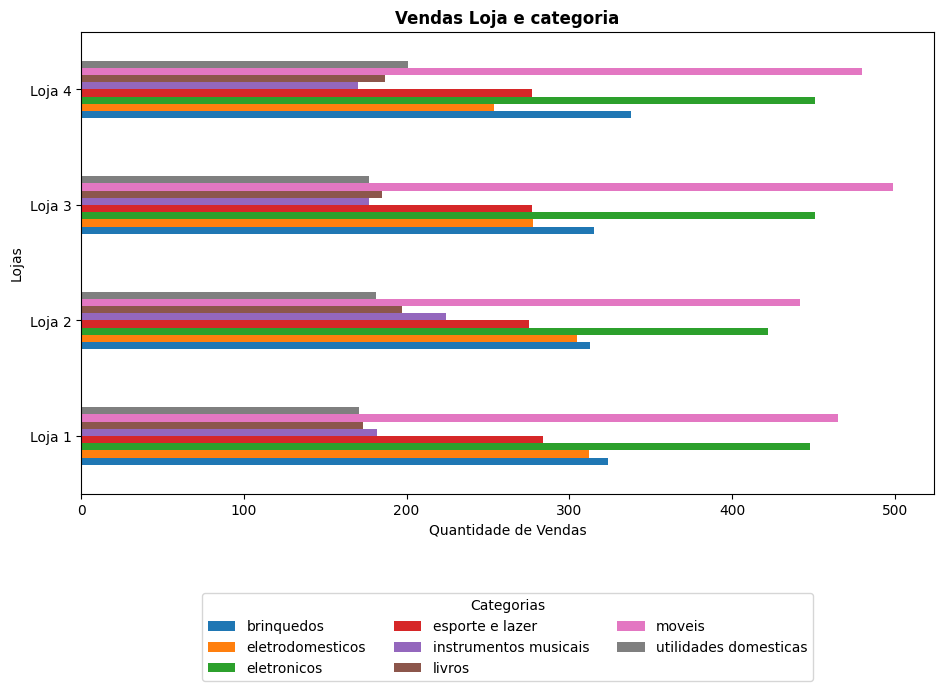

In [ ]:
# Agora vamos criar um gráfico horizontal para enxergamos com mais clareza
tabela_plotada = tabela_completa.T
tabela_plotada.plot(kind='barh', figsize=(11,6))
plt.title("Vendas Loja e categoria", fontweight = 'bold')
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Lojas")
plt.legend(title = 'Categorias', bbox_to_anchor=(0.5, -0.2), loc = 'upper center', ncol = 3)
plt.show()

Conclusão: Cada loja tem pontos fortes em categorias diferentes:
Loja 1: Destaque em móveis, eletrônicos e eletrodomésticos.
Loja 2: Destaque em instrumentos musicais e livros.
Loja 3: Lidera em móveis e eletrônicos, mostrando força em produtos de maior valor agregado.
Loja 4: Lidera em brinquedos e utilidades domésticas, com bom desempenho também em eletrônicos e móveis. A análise indica perfis de público e estratégias de venda distintos para cada loja.

# 3. Média de Avaliação das Lojas

In [ ]:
# Vamos calcular as médias
lojas = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias_avaliativas = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}
tabela_medias = pd.DataFrame(list(medias_avaliativas.items()), columns=['Loja', 'Média de Avaliação'])
tabela_medias

,Loja,Média de Avaliação
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


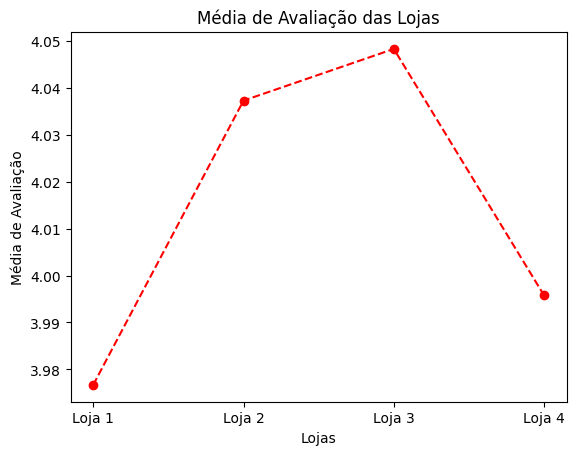

In [ ]:
# Vamos plotar o gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [3.976685,4.037304,4.048326,3.995759]
plt.plot(lojas, medias, marker='o', linestyle='--', color = 'red')
plt.title("Média de Avaliação das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.show()

Conclusão: As médias de avaliação são muito próximas entre as lojas, todas em torno de 4.0. A Loja 3 tem a maior média (4.05), seguida pela Loja 2 (4.04), Loja 4 (4.00) e Loja 1 (3.98). Isso sugere que, em geral, os clientes estão satisfeitos com todas as lojas, com pouca diferenciação significativa neste quesito.

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Vamos contar os produtos por categoria e plotar um gráfico para melhor entender
lojas = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

Tabelas = [ l.groupby("Categoria do Produto").size() for l, n in zip(lojas, nomes)]
Tabela_completa = pd.concat(Tabelas, axis=1)
Tabela_completa.columns = nomes
Tabela_completa

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


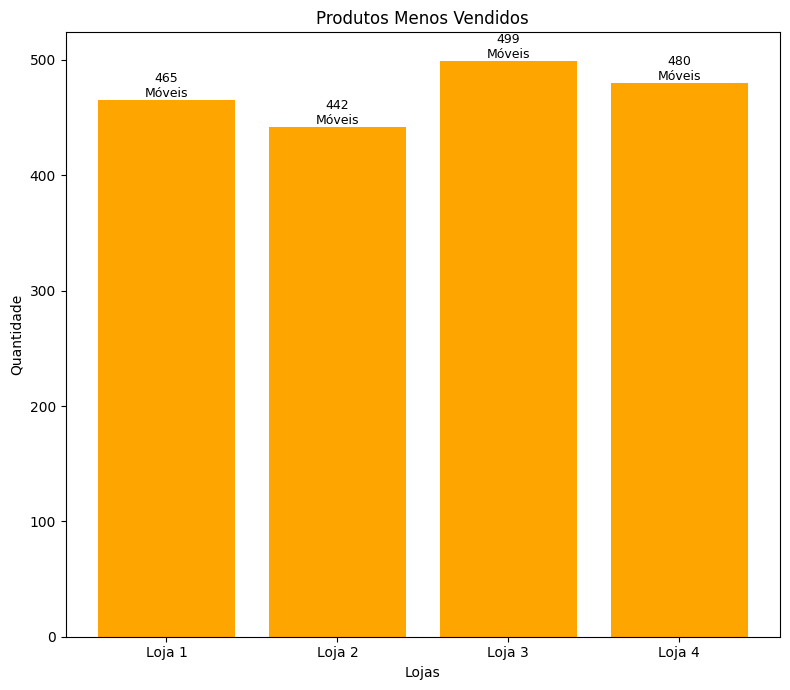

In [ ]:
# Vamos comparar os mais vendidos entre as lojas
mais_vendidos = pd.DataFrame({
    'Produto': ['Móveis', 'Móveis', 'Móveis', 'Móveis'],
    'Quantidade': [465, 442, 499, 480]
}, index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

# Gráfico de barras
plt.figure(figsize=(8, 7))
plt.bar(mais_vendidos.index, mais_vendidos['Quantidade'], color='orange')
for i, (produto, quantidade) in enumerate(zip(mais_vendidos['Produto'], mais_vendidos['Quantidade'])):
    plt.text(i, quantidade , f'{quantidade}\n{produto}', ha='center', va='bottom', fontsize=9)

plt.title("Produtos Menos Vendidos")
plt.xlabel("Lojas")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()


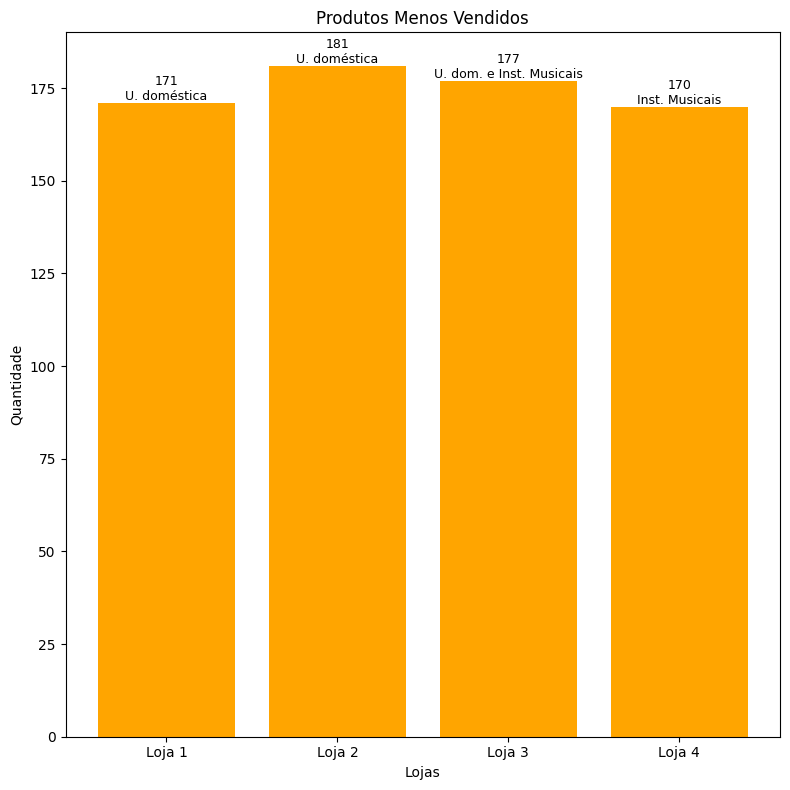

In [ ]:
# Agora vamos comparar os produtos menos vendidos entre as lojas
menos_vendidos = pd.DataFrame({
    'Produto': ['U. doméstica', 'U. doméstica', 'U. dom. e Inst. Musicais', 'Inst. Musicais'],
    'Quantidade': [171, 181, 177, 170]
}, index=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

# Gráfico de barras
plt.figure(figsize=(8, 8))  # Tamanho maior
plt.bar(menos_vendidos.index, menos_vendidos['Quantidade'], color='orange')
for i, (produto, quantidade) in enumerate(zip(menos_vendidos['Produto'], menos_vendidos['Quantidade'])):
    plt.text(i, quantidade , f'{quantidade}\n{produto}', ha='center', va='bottom', fontsize=9)

plt.title("Produtos Menos Vendidos")
plt.xlabel("Lojas")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

Conclusão:
Mais Vendidos: A categoria "Móveis" é a mais vendida nas Lojas 1, 3 e 4. Na Loja 2, "Móveis" e "Eletrônicos" têm vendas expressivas. "Eletrônicos" também se destaca nas Lojas 1, 3 e 4.
Menos Vendidos: "Utilidades Domésticas" e "Livros" aparecem como as categorias com menos vendas na Loja 1. "Instrumentos Musicais" e "Livros" são as categorias com menos vendas nas Lojas 3 e 4. Na Loja 2, "Utilidades Domésticas" tem a menor quantidade de vendas. Isso reforça os nichos de atuação de cada loja.

# 5. Frete Médio por Loja


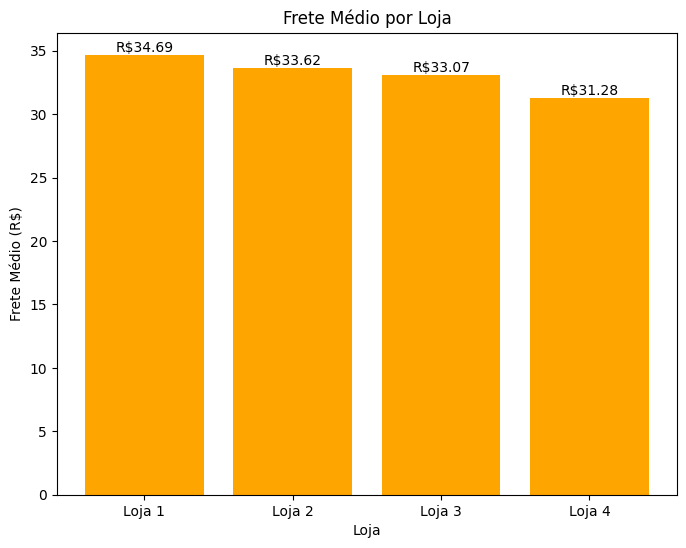

In [20]:
# Vamos calcular a média e plotar um gráfico para entender melhor
lojas = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
frete_medio = [l['Frete'].mean() for l in lojas]
frete_medio_df = pd.DataFrame({'Loja': nomes, 'Frete Médio': frete_medio})
plt.figure(figsize=(8, 6),)
plt.bar(frete_medio_df['Loja'], frete_medio_df['Frete Médio'], color= 'orange')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')

for i, v in enumerate(frete_medio_df['Frete Médio']):
    plt.text(i, v, f'R${v:.2f}', ha='center', va='bottom')

plt.show()

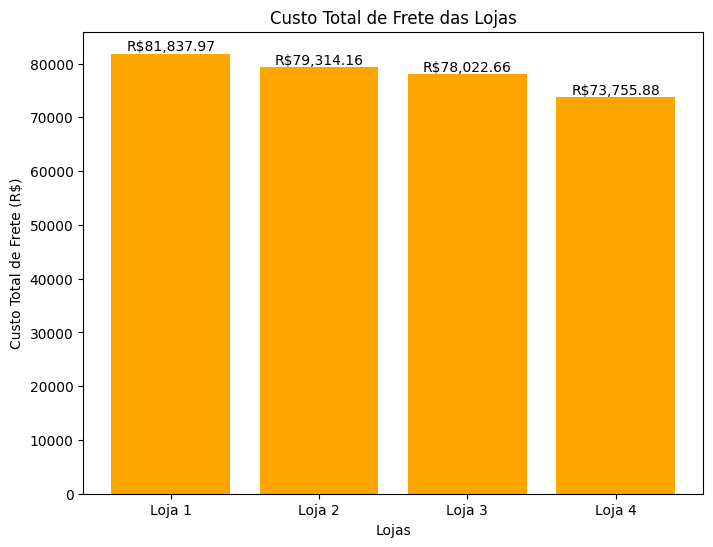

In [21]:
# Agora vamos calcular os custos totais com frete e plotar um gráfico
custo_frete1 = loja['Frete'].sum()
custo_frete2 = loja2['Frete'].sum()
custo_frete3 = loja3['Frete'].sum()
custo_frete4 = loja4['Frete'].sum()
custos_frete = [custo_frete1, custo_frete2, custo_frete3, custo_frete4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
df_custos_frete = pd.DataFrame({'Loja': lojas, 'Custo Total de Frete': custos_frete})
plt.figure(figsize=(8, 6))
plt.bar(df_custos_frete['Loja'], df_custos_frete['Custo Total de Frete'], color='orange')
plt.title("Custo Total de Frete das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Custo Total de Frete (R$)")

for i, v in enumerate(df_custos_frete['Custo Total de Frete']):
    plt.text(i, v, f'R${v:,.2f}', ha='center', va='bottom')

plt.show()

Conclusão:

Frete Médio: A Loja 3 tem o maior frete médio, seguida pela Loja 1, Loja 2 e Loja 4. As médias são relativamente próximas.

Custo Total de Frete: A Loja 3 também apresenta o maior custo total com frete, seguida pela Loja 1, Loja 2 e Loja 4. A Loja 4 tem o menor custo total com frete.

####**Conclusão Geral (Qual loja vender?)**
Com base exclusivamente nos dados apresentados no relatório:

A Loja 4 consistentemente apresenta os indicadores financeiros mais baixos, como o menor faturamento e o menor custo total com frete.
Embora a Loja 4 lidere em categorias como Brinquedos e Utilidades Domésticas, seu faturamento geral é o menor entre as quatro.
As médias de avaliação dos clientes são muito parecidas entre todas as lojas, não sendo um fator fortemente distintivo.
As Lojas 1 e 3 parecem ter um desempenho de faturamento mais robusto, especialmente em categorias de maior valor agregado como Eletrônicos e Móveis.
Recomendação baseada nos dados: A Loja 4 parece ser a candidata mais provável para venda, devido ao seu menor faturamento em comparação com as demais.
